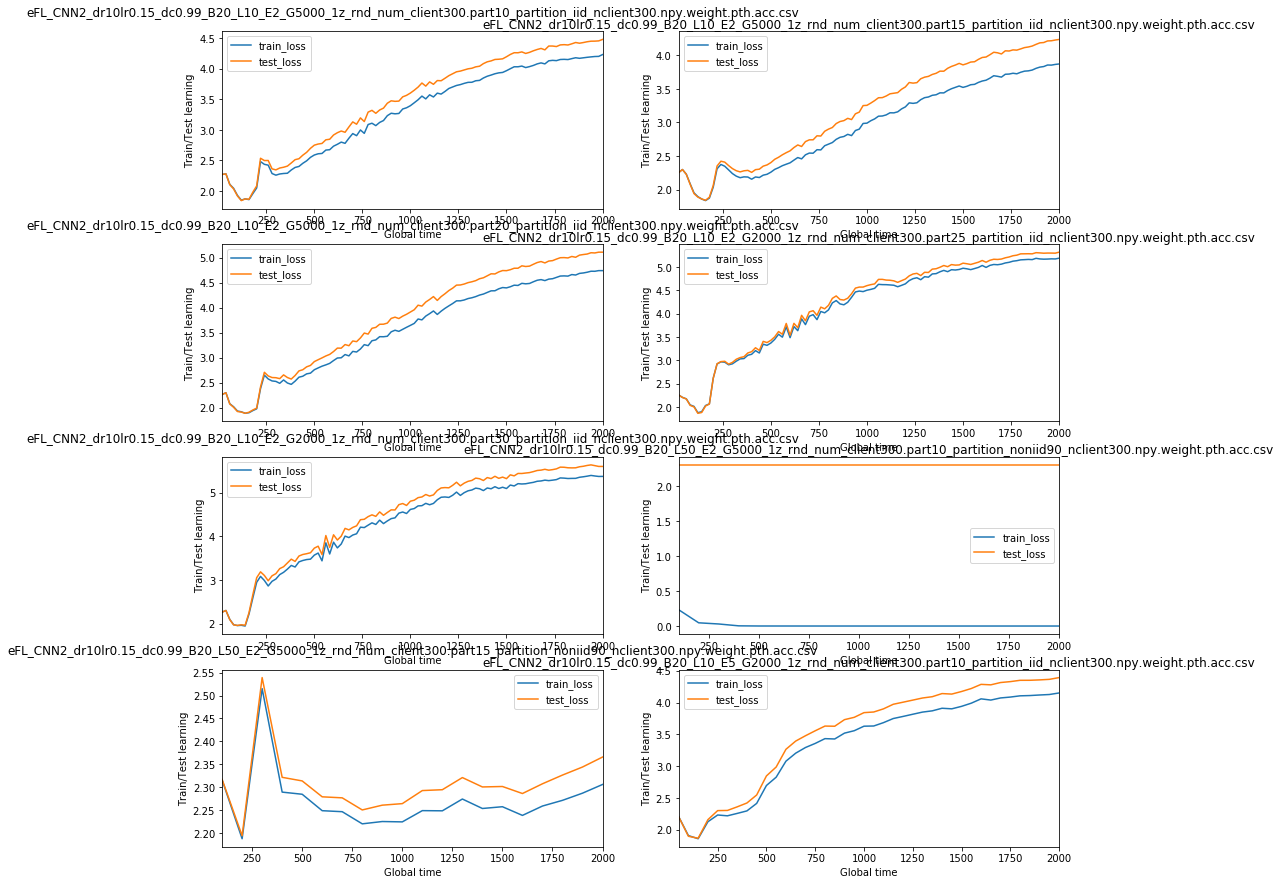

In [1580]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

clusters = ['10', '20', '30', '40', '41', '50']
algs = ['z_rnd', 'z_metis', 'z_metis_q']

femnist_path_file = "./output/femnist/acc/"
cifar100_path_file = "./output/cifar100/acc/"
cifar10_path_file = "./output/cifar10/acc/"
mnist_pth_file = "./output/mnist/acc/"


files = [
    #here we start to decay at edge update
    # #client300 and fix lr=0.15, dc=0.99
        "eFL_CNN2_dr10lr0.15_dc0.99_B20_L10_E2_G5000_1z_rnd_num_client300.part10_partition_iid_nclient300.npy.weight.pth.acc.csv",    
        "eFL_CNN2_dr10lr0.15_dc0.99_B20_L10_E2_G5000_1z_rnd_num_client300.part15_partition_iid_nclient300.npy.weight.pth.acc.csv",
        "eFL_CNN2_dr10lr0.15_dc0.99_B20_L10_E2_G5000_1z_rnd_num_client300.part20_partition_iid_nclient300.npy.weight.pth.acc.csv",
        "eFL_CNN2_dr10lr0.15_dc0.99_B20_L10_E2_G2000_1z_rnd_num_client300.part25_partition_iid_nclient300.npy.weight.pth.acc.csv",
        "eFL_CNN2_dr10lr0.15_dc0.99_B20_L10_E2_G2000_1z_rnd_num_client300.part30_partition_iid_nclient300.npy.weight.pth.acc.csv",
        "eFL_CNN2_dr10lr0.15_dc0.99_B20_L50_E2_G5000_1z_rnd_num_client300.part10_partition_noniid90_nclient300.npy.weight.pth.acc.csv",
        "eFL_CNN2_dr10lr0.15_dc0.99_B20_L50_E2_G5000_1z_rnd_num_client300.part15_partition_noniid90_nclient300.npy.weight.pth.acc.csv",
        #"eFL_CNN2_dr10lr0.15_dc0.99_B20_L50_E2_G2000_1z_rnd_num_client300.part10_partition_iid_nclient300.npy.weight.pth.acc.csv",
        #"eFL_CNN2_dr10lr0.15_dc0.99_B20_L50_E2_G2000_1z_rnd_num_client300.part15_partition_iid_nclient300.npy.weight.pth.acc.csv",

        "eFL_CNN2_dr10lr0.15_dc0.99_B20_L10_E5_G2000_1z_rnd_num_client300.part10_partition_iid_nclient300.npy.weight.pth.acc.csv"
        
        #"eFL_CNN2_dr10lr0.15_dc0.99_B20_L10_E2_G5000_1z_rnd_num_client300.part30_partition_noniid90_nclient300.npy.weight.pth.acc.csv"
        #"eFL_CNN2_dr10lr0.15_dc0.99_B20_L10_E2_G5000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient300.npy.part.30.weight.pth.acc.csv",
        #cnn3dr10
        #"eFL_CNN3dr10lr0.002_dc0.05_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN3dr10lr0.003_dc0.05_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN3dr10lr0.004_dc0.05_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN3dr10lr0.005_dc0.05_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        
        #"eFL_CNN3dr10lr0.002_dc0.01_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN3dr10lr0.003_dc0.01_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN3dr10lr0.004_dc0.01_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN3dr10lr0.005_dc0.01_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        
        #"eFL_CNN3dr10lr0.05_dc0.99_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN3dr10lr0.1_dc0.99_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN3dr10lr0.15_dc0.99_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN3dr10lr0.2_dc0.99_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv"
        
        #end of cnn3dr10
    #--------- the old way for exponetially decay
        
        #"eFL_CNN2_dr10lr0.03_dc0.99_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN2_dr10lr0.05_dc0.99_B20_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN2_dr10lr0.07_dc0.99_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN2_dr10lr0.09_dc0.99_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN2_dr10lr0.11_dc0.99_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN2_dr10lr0.13_dc0.99_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN2_dr10lr0.15_dc0.99_B20_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN2_dr10lr0.2_dc0.99_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN2_dr10lr0.2_dc0.99_B20_L10_E2_G5000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv"

        
        #"eFL_CNN2_dr10lr0.005_dc1.0_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN2_dr10lr0.005_dc0.995_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN2_dr10lr0.002_dc0.999_B20_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv"

    #---------
        #"eFL_CNN2_dr10lr0.002_dc0.995_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN2_dr10lr0.003_dc0.995_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN2_dr10lr0.004_dc0.995_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN2_dr10lr0.005_dc0.995_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        
        #"eFL_CNN2_dr10lr0.002_dc0.99_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN2_dr10lr0.003_dc0.99_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN2_dr10lr0.004_dc0.99_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN2_dr10lr0.005_dc0.99_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        
    
        #"eFL_CNN2_dr10lr0.002_dc0.05_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN2_dr10lr0.003_dc0.05_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN2_dr10lr0.004_dc0.05_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN2_dr10lr0.005_dc0.05_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN2_dr10lr0.002_dc0.1_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN2_dr10lr0.003_dc0.1_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        
        #"eFL_CNN2_dr10eps120lr0.002_dc0.1_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN2_dr10eps120lr0.003_dc0.1_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        
        #"eFL_CNN2_dr10lr0.004_dc0.1_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN2_dr10lr0.005_dc0.1_B32_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv"
    #end of decay at edge update
    
        #"eFL_CNN2_dr10lr0.003_dc0.85_B32_L10_E2_G10000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN2_dr10lr0.0025_dc0.9_B32_L10_E2_G5000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN2_dr10lr0.002_dc1_B32_L10_E2_G15000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN2_dr10lr0.003_dc1_B32_L10_E2_G15000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        
        #...............
        #"1eFL_CNN2_dr10lr0.005_dc0.999_B20_L10_E2_G5000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN2_dr10lr0.002_dc0.999_B20_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        
        #"eFL_CNN2_dr10lr0.005_dc0.999_B20_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv"
        #"eFL_CNN2_dr10_lr.005_B32_L5_E2_G5000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv"
        #"eFL_CNN2lr0.005_dc0.995_B32_L5_E2_G5000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv"
        #...............
        
        #cifar10_path_file + "eFL_sCNN_B20_L10_E2_G5000_1z_rnd_num_client250.part25.weight.pth.acc.csv",
        #cifar10_path_file + "FL_sCNN_B20_L5_G2500_partition_iid_nclient250.npy.weight.pth.acc.csv"
        #cifar10_path_file + "eFL_CNN2_dr10_lr.005_B32_L5_E2_G5000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #cifar10_path_file + "eFL_CNN2_dr10_lr.005_B32_L10_E2_G5000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        
        #cifar10_path_file + "eFL_CNN2_dr10lr0.005_dc0.995_B20_L10_E2_G5000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #cifar10_path_file + "eFL_CNN2_dr10_lr.001_B20_L10_E2_G5000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #cifar10_path_file + "eFL_CNN2lr0.01_dc0.995_B32_L5_E2_G5000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #"eFL_CNN2_dr10lr0.005_dc0.999_B20_L10_E2_G6000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv
        #cifar10_path_file + "eFL_CNN3_B50_L10_E2_G5000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv"
        #{bad} cifar10_path_file + "eFL_CNN2_dr10lr0.005_dc0.995_B20_L10_E2_G5000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #cifar10_path_file + "eFL_CNN3lr0.005_dc0.995_B20_L10_E2_G5000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv"
        #cifar10_path_file + "eFL_1CNN2_dr10lr0.005_dc0.995_B20_L10_E2_G5000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
        #cifar10_path_file + "eFL_CNN2_dr10_lr.001nodecay_B50_L10_E2_G5000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv",
    #cifar10_path_file + "eFL_MLP3_B20_L10_E2_G5000_g_nw_d_euclidean_CNN2_G10_partition_noniid90_nclient250.npy.part.25.weight.pth.acc.csv"

    
#        femnist_path_file + "eFL_MLP2_B50_L10_E2_G2000_1z_rnd_num_client1000.part50.weight.pth.acc.csv",
#        cifar100_path_file + "eFL_CNN2_B20_L10_E2_G2000_1z_rnd_num_client100.part15.weight.pth.acc.csv"
        #mnist_path_file + "eFL_MLP2_B10_L10_E2_G5000_1z_rnd_num_client300.part10.weight.pth.acc.csv",
        #mnist_path_file + "eFL_MLP2_B10_L10_E2_G5000_1z_rnd_num_client300.part20.weight.pth.acc.csv",
        #mnist_path_file + "eFL_MLP2_B10_L10_E2_G5000_1z_rnd_num_client300.part30.weight.pth.acc.csv",
        #mnist_path_file + "eFL_MLP2_B10_L40_E2_G1000_1z_rnd_num_client300.part37.weight.pth.acc.csv",
        #mnist_path_file + "eFL_MLP2_B10_L10_E2_G5000_1z_rnd_num_client300.part40.weight.pth.acc.csv",
        
        #mnist_path_file + "eFL_MLP2_B10_L10_E5_G1000_1z_rnd_num_client300.part42.weight.pth.acc.csv"
        #mnist_path_file + "eFL_MLP2_B10_L10_E2_G5000_1z_rnd_num_client300.part50.weight.pth.acc.csv"
        #mnist_path_file + "eFL_MLP2_B10_L10_E2_G5000_g_nw_d_euclidean_MLP2_G10_partition_noniid90_nclient300.npy.part.50.weight.pth.acc.csv"
    #mnist_path_file + "eFL_MLP2_B10_L10_E2_G5000_g_nw_d_euclidean_MLP2_G10_partition_noniid90_nclient300.npy.part.20.weight.pth.acc.csv"

        ]
dff = []
n_files = len(files)
for i in range(n_files):
    dff.append(pd.read_csv(cifar10_path_file + files[i]))

n_rows = int(n_files / 2)
if n_files % 2 !=0:
    n_rows += 1
fig, ax = plt.subplots(n_rows, 2, figsize=(15,15))

for i in range(n_files):
    dff[i][dff[i]['global_round'] <= 2000].plot(x = "global_round", y = ["train_loss", "test_loss"],
                        kind = "line", ax = ax[int(i/2)][i%2]) #, label = ["train_loss", "train_acc", "test_loss", "x test_acc"]
    #dff[i].plot(x = "global_round", y = ["train_loss", "test_loss"],
    #                    kind = "line", ax = ax[int(i/2)][i%2]) #, label = ["train_loss", "train_acc", "test_loss", "x test_acc"]
    if i % 2 != 0:
        ax[int(i/2)][i%2].set_title(files[i], y=1.0, pad=-200)
    else:
        ax[int(i/2)][i%2].set_title(files[i], y = 1.05)
    ax[int(i/2)][i%2].set_ylabel("Train/Test learning")
    ax[int(i/2)][i%2].set_xlabel("Global time")
    ax[int(i/2)][i%2].legend(loc='best')


plt.show()


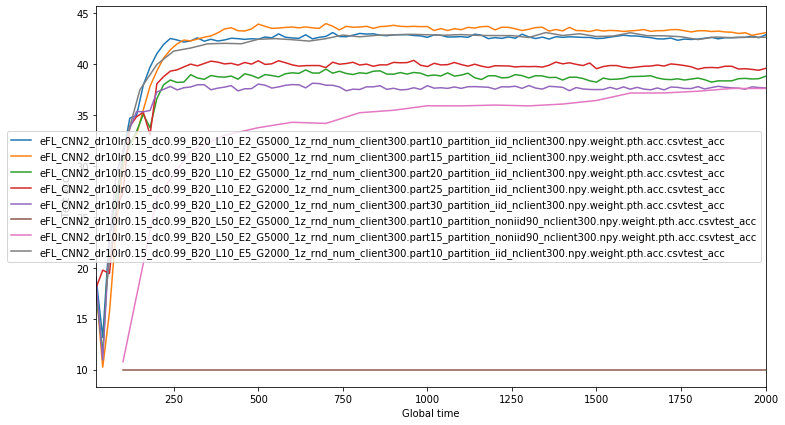

In [1581]:
fig, ax = plt.subplots(figsize=(12,7))

for i in range(n_files):
    dff[i][dff[i]['global_round'] <= 2000].plot(x = "global_round", y = ["test_acc"],
                        kind = "line", ax = ax, label = [files[i] + "test_acc"])
    #dff[i].plot(x = "global_round", y = ["test_acc"],
    #                    kind = "line", ax = ax, label = [files[i] + "test_acc"])
#ax[i].set_title(files[i])
ax.set_ylabel("Test acc")
ax.set_xlabel("Global time")
ax.legend(loc='best')


plt.show()


4.040322417728935e-06
6.060483626593402e-06
8.08064483545787e-06
1.0100806044322337e-05
0.00010100806044322338



1.3273703115989098e-05
1.9910554673983648e-05
2.6547406231978196e-05
3.3184257789972745e-05
0.0003318425778997275


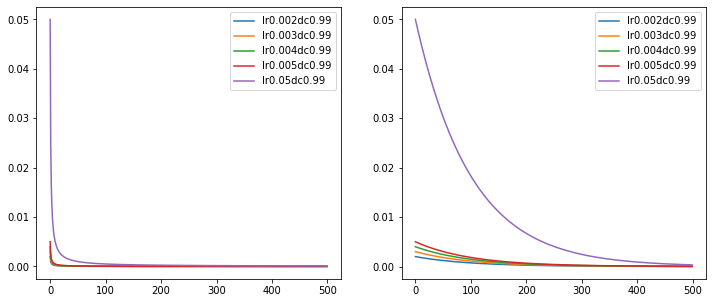

In [1582]:
x = np.arange(500)
lr = [.002, 0.003, 0.004, .005, 0.05]
dc0 = [0.99]
dc1 = [0.99]

n_lr = len(lr)
n_dc = len(dc0)
fig, ax = plt.subplots(1, 2, figsize=(12,5))
for i in range (n_dc):
    for j in range (n_lr):
    
        #y = lr[j]* dc0[i] ** x
        y = lr[j] * (1 / (1 + dc0[i] * x))
        
        ax[0].plot(x,y, label = "lr" + str(lr[j]) + "dc" + str(dc0[i]))

        print(y[499])

ax[0].legend(loc = 'best')
print("\n\n")
for i in range (n_dc):
    for j in range (n_lr):
        y = lr[j]* dc1[i] ** x
        
        #y = lr[j] * (1 / (1 + dc1[i] * x))
        ax[1].plot(x,y, label = "lr" + str(lr[j]) + "dc" + str(dc1[i]))

        print(y[499])
ax[1].legend(loc = 'best')


plt.show()

In [1583]:
0.00009

9e-05